<a href="https://colab.research.google.com/github/deltashivaa/-celsius-to-fahrenheit-/blob/main/Barricade_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = "/content/Barricade Detection.v4i.yolov8.zip"  # Replace with your ZIP filename
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [2]:
import os

dataset_path = "/content/dataset"  # Change this if your extracted path is different
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['test', 'valid', 'train', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']


In [3]:
import os

train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

print("Train images:", os.listdir(os.path.join(train_path, "images"))[:5])  # Check first 5 images
print("Train labels:", os.listdir(os.path.join(train_path, "labels"))[:5])  # Check first 5 labels
print("Validation images:", os.listdir(os.path.join(valid_path, "images"))[:5])
print("Validation labels:", os.listdir(os.path.join(valid_path, "labels"))[:5])


Train images: ['OIP-7-_jpg.rf.7ffb630cb397e04972363a5baf083ecd.jpg', '51c29ee5d903e_webp.rf.2ad31fdee6349b95f6e6f3bbc35b3c6a.jpg', 'OIP-14-_jpg.rf.52da2d6c1a128d77d353dbc99163c709.jpg', 'BArri-raw_jpg.rf.786080f288a35210704a70dda4b0a045.jpg', 'OIP-20-_jpg.rf.3e8000e0a1457bb0050a0bb99cb499f5.jpg']
Train labels: ['df2ab97c7dce11e0ab4827e11496dd27_jpg.rf.5d6d3a227d1a63d5d06c8507371e0afa.txt', 'suggested-H8LjvuflEcKmCx7miE61_jpg.rf.03d8977392f14aa3351ee99f8e890e03.txt', 'BArri-raw_jpg.rf.786080f288a35210704a70dda4b0a045.txt', 'product-jpeg-500x500_webp.rf.49b4736bead8e35d406466a0516f4d4f.txt', 'police-barricade-signage_jpg.rf.ac5e1f8f2e549cbc579755c105c00182.txt']
Validation images: ['OIP-21-_jpg.rf.f770cf16dee5b0a217c93bd03bef58e8.jpg', 'Types-of-Barricades-2-1024x768_webp.rf.798f0fd7b2be2bbb66424cbbc210019b.jpg', 'temporary-barricades_jpg.rf.9db6168b14bbca7e8b754f88ee778222.jpg', 'iStock-1163567443-1536x1229_jpg.rf.aff2365b1dd533b63953ca4c7277ab4a.jpg', 'thumb-1-_jpg.rf.9128f866f27f19ec1

In [4]:
with open("/content/dataset/data.yaml", "r") as file:
    print(file.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Barricade']

roboflow:
  workspace: shivaa-r
  project: barricade-detection-pfppv
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/shivaa-r/barricade-detection-pfppv/dataset/4


In [5]:
yaml_content = """train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 1
names: ['Barricade']
"""

with open("/content/dataset/data.yaml", "w") as file:
    file.write(yaml_content)

print("Updated data.yaml successfully!")


Updated data.yaml successfully!


In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [8]:
from ultralytics import YOLO

# Load YOLOv8 nano model (small and fast)
model = YOLO("yolov8n.pt")

# Train the model on CPU
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640, batch=16)


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 15.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 327.44it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 436.78it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.953      2.794      1.956         56        640: 100%|██████████| 3/3 [00:46<00:00, 15.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         12         43    0.00778      0.651      0.139     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.958      2.855      1.884         62        640: 100%|██████████| 3/3 [00:37<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         12         43    0.00861      0.721      0.191     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.584      2.619      1.737         42        640: 100%|██████████| 3/3 [00:37<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         12         43     0.0106      0.884      0.229     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.781      2.428      1.868         66        640: 100%|██████████| 3/3 [00:38<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43     0.0106      0.884      0.189     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.619       2.05      1.699         53        640: 100%|██████████| 3/3 [00:38<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         12         43       0.01      0.837      0.145     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.602      1.937      1.727         61        640: 100%|██████████| 3/3 [00:39<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         12         43    0.00972      0.814      0.179     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G       1.69          2      1.754         73        640: 100%|██████████| 3/3 [00:39<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         12         43    0.00972      0.814      0.263      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.606      1.937      1.732         30        640: 100%|██████████| 3/3 [00:38<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         12         43    0.00972      0.814      0.194      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.603      1.794      1.662         73        640: 100%|██████████| 3/3 [00:39<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all         12         43      0.615     0.0465      0.209      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.559      1.826      1.665         58        640: 100%|██████████| 3/3 [00:45<00:00, 15.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]

                   all         12         43     0.0425      0.605      0.273      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       1.42      1.684      1.547         60        640: 100%|██████████| 3/3 [00:40<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]

                   all         12         43      0.454      0.349      0.308      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.515      1.715      1.551         77        640: 100%|██████████| 3/3 [00:40<00:00, 13.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all         12         43      0.766      0.228      0.314      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.646      1.698      1.717         49        640: 100%|██████████| 3/3 [00:42<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         43      0.371      0.247      0.223      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.515      1.679      1.603         63        640: 100%|██████████| 3/3 [00:39<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         12         43      0.444       0.26      0.263      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.528      1.686      1.571         57        640: 100%|██████████| 3/3 [00:41<00:00, 13.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         12         43      0.554      0.279      0.287      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.345      1.628      1.521         28        640: 100%|██████████| 3/3 [00:39<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         12         43      0.593      0.271      0.335      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.564      1.528      1.565         54        640: 100%|██████████| 3/3 [00:42<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all         12         43      0.559      0.349       0.33      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.436      1.516      1.521         70        640: 100%|██████████| 3/3 [00:41<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all         12         43      0.727      0.279      0.342      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.492      1.559      1.509         53        640: 100%|██████████| 3/3 [00:41<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         43      0.517      0.323      0.328      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.492      1.422      1.525         79        640: 100%|██████████| 3/3 [00:39<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         43      0.412      0.395       0.34      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.348      1.341       1.43         64        640: 100%|██████████| 3/3 [00:41<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         12         43      0.544      0.372      0.367      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.506      1.587      1.504         61        640: 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]

                   all         12         43      0.648      0.349       0.37      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.493      1.403      1.502         71        640: 100%|██████████| 3/3 [00:46<00:00, 15.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         43      0.581      0.395       0.39      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.411       1.38      1.439         64        640: 100%|██████████| 3/3 [00:40<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         43      0.598      0.419      0.442      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.418      1.368      1.447         60        640: 100%|██████████| 3/3 [00:41<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43      0.427      0.419      0.376      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.317      1.286      1.378         63        640: 100%|██████████| 3/3 [00:39<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         12         43      0.327      0.442      0.306       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.333      1.275      1.409         63        640: 100%|██████████| 3/3 [00:38<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]

                   all         12         43        0.4      0.465      0.363       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.296      1.348      1.376         54        640: 100%|██████████| 3/3 [00:38<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         12         43       0.83      0.302      0.413      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.425       1.53      1.452         59        640: 100%|██████████| 3/3 [00:40<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         12         43       0.83      0.302      0.413      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.233      1.258      1.345         50        640: 100%|██████████| 3/3 [00:40<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43      0.562      0.349      0.354      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.343      1.267      1.393         64        640: 100%|██████████| 3/3 [00:41<00:00, 13.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         12         43      0.791      0.439       0.48      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.285      1.277      1.346         58        640: 100%|██████████| 3/3 [00:40<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         12         43      0.823      0.488      0.568      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.273      1.256      1.403         53        640: 100%|██████████| 3/3 [00:41<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         12         43      0.823      0.488      0.568      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.283       1.22      1.345         60        640: 100%|██████████| 3/3 [00:39<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]

                   all         12         43      0.673      0.465      0.554      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.287      1.244      1.392         65        640: 100%|██████████| 3/3 [00:39<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         12         43      0.635      0.442      0.486      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.186      1.164      1.324         63        640: 100%|██████████| 3/3 [00:40<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all         12         43      0.589      0.442      0.485       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.34      1.386      1.425         35        640: 100%|██████████| 3/3 [00:45<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43      0.589      0.442      0.485       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.243      1.226      1.341         45        640: 100%|██████████| 3/3 [00:40<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43      0.711      0.459      0.551      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.29      1.206      1.356         71        640: 100%|██████████| 3/3 [00:40<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         12         43      0.515      0.442       0.47      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.283       1.19      1.352         76        640: 100%|██████████| 3/3 [00:38<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all         12         43      0.574      0.408      0.443      0.198


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.229      1.463      1.368         38        640: 100%|██████████| 3/3 [00:40<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

                   all         12         43      0.574      0.408      0.443      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.331      1.445       1.48         33        640: 100%|██████████| 3/3 [00:38<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         12         43      0.641      0.488      0.446      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.299      1.378      1.415         49        640: 100%|██████████| 3/3 [00:39<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]

                   all         12         43      0.606      0.465      0.422      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.234      1.273       1.33         23        640: 100%|██████████| 3/3 [00:40<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all         12         43      0.531      0.488      0.437      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.261       1.36      1.382         38        640: 100%|██████████| 3/3 [00:41<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all         12         43      0.531      0.488      0.437      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.168      1.254      1.347         30        640: 100%|██████████| 3/3 [00:39<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         12         43      0.553      0.442      0.477      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.159      1.361      1.331         20        640: 100%|██████████| 3/3 [00:39<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         12         43      0.605      0.464      0.525       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.142      1.197      1.334         35        640: 100%|██████████| 3/3 [00:40<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]

                   all         12         43      0.597      0.535      0.541      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.103      1.218      1.281         27        640: 100%|██████████| 3/3 [00:40<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         12         43      0.597      0.535      0.541      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G       1.11      1.226      1.274         23        640: 100%|██████████| 3/3 [00:41<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

                   all         12         43      0.592      0.558      0.543      0.269



50 epochs completed in 0.626 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


                   all         12         43      0.591      0.558      0.544      0.265
Speed: 2.5ms preprocess, 224.7ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b73a1b68050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [18]:
import glob

weights = glob.glob("/content/runs/detect/train/weights/best.pt")
print("Found model:", weights)


Found model: ['/content/runs/detect/train/weights/best.pt']


In [19]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run detection on your uploaded image
results = model.predict(source="/content/BArri raw.jpg", save=True, conf=0.5)

# Show results
results.show()



image 1/1 /content/BArri raw.jpg: 480x640 1 Barricade, 188.7ms
Speed: 5.5ms preprocess, 188.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


AttributeError: 'list' object has no attribute 'show'

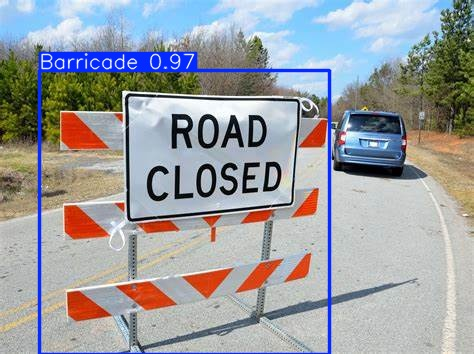

In [20]:
from PIL import Image
import glob

# Get the saved image path
predicted_image = glob.glob("runs/detect/predict/*.jpg")[0]

# Show the detected image
Image.open(predicted_image)


In [26]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run detection on your uploaded image
results = model.predict(source="/content/1-1-768x512.jpg", save=True, conf=0.5)

# Show results
results.show()


image 1/1 /content/1-1-768x512.jpg: 448x640 1 Barricade, 173.6ms
Speed: 4.9ms preprocess, 173.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4


AttributeError: 'list' object has no attribute 'show'

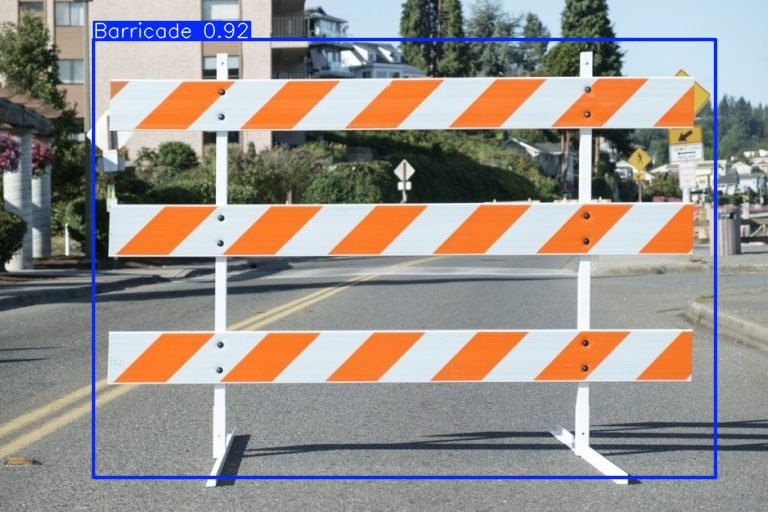

In [27]:
from PIL import Image
import glob

# Get the saved image path
predicted_image = glob.glob("runs/detect/predict4/*.jpg")[0]

# Show the detected image
Image.open(predicted_image)

In [28]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Update path if needed

# Run detection on video
results = model.predict(source="/content/Barricade_vc.mp4", save=True, conf=0.5)

# Get output video path
print("Results saved to:", results[0].save_dir)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 163.8ms
video 1/1 (frame 2/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 144.4ms
video 1/1 (frame 3/111) /content/Barricade_vc.mp4: 640x384 (no detections), 136.9ms
video 1/1 (frame 4/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 138.8ms
video 1/1 (frame 5/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 136.1ms
video 1/1 (frame 6/111) /content/Barricade_vc.mp4: 6

In [31]:
results = model(source='/content/Barricade_vc.mp4', stream=True)  # Enable streaming
for r in results:
    boxes = r.boxes  # Bounding boxes
    masks = r.masks  # Segmentation masks (if applicable)
    probs = r.probs  # Class probabilities




video 1/1 (frame 1/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 143.8ms
video 1/1 (frame 2/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 137.0ms
video 1/1 (frame 3/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 135.7ms
video 1/1 (frame 4/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 136.7ms
video 1/1 (frame 5/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 132.4ms
video 1/1 (frame 6/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 132.6ms
video 1/1 (frame 7/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 136.8ms
video 1/1 (frame 8/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 150.5ms
video 1/1 (frame 9/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 140.2ms
video 1/1 (frame 10/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 141.3ms
video 1/1 (frame 11/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 133.3ms
video 1/1 (frame 12/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 141.9ms
video 1/1 (frame 13/111) /content/Ba

In [32]:
results = model(source='/content/Barricade_vc.mp4', save=True)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 845.9ms
video 1/1 (frame 2/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 222.5ms
video 1/1 (frame 3/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 215.1ms
video 1/1 (frame 4/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 193.6ms
video 1/1 (frame 5/111) /content/Barricade_vc.mp4: 640x384 1 Barricade, 135.5ms
video 1/1 (frame 6/111) /content/Barricade_vc.mp4: 640x3

In [36]:
import os

output_dir = "runs/detect/predict5"
print("Exists:", os.path.exists(output_dir))  # Check if the folder exists
print("Contents:", os.listdir(output_dir))  # List files inside the folder


Exists: True
Contents: ['Barricade_vc.avi']


In [38]:
import os

input_video = "runs/detect/predict5/Barricade_vc.avi"
output_video = "runs/detect/predict5/Barricade_vc.mp4"

# Convert AVI to MP4 using ffmpeg
os.system(f"ffmpeg -i {input_video} -vcodec libx264 {output_video}")


0

In [39]:
import os

output_video = "runs/detect/predict5/Barricade_vc.mp4"

if os.path.exists(output_video):
    print("✅ MP4 file created successfully!")
else:
    print("❌ MP4 conversion failed.")


✅ MP4 file created successfully!


In [42]:
!ffmpeg -y -i runs/detect/predict5/Barricade_vc.avi -vf "scale=640:360" -c:v libx264 -preset slow -crf 23 -pix_fmt yuv420p -c:a aac -b:a 128k runs/detect/predict5/Barricade_vc.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [43]:
!ffmpeg -i runs/detect/predict5/Barricade_vc.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [45]:
from google.colab import files

files.download("runs/detect/predict5/Barricade_vc.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Update path if needed

# Run detection on video
results = model.predict(source="/content/Barricade 2.mp4", save=True, conf=0.5)

# Get output video path
print("Results saved to:", results[0].save_dir)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/360) /content/Barricade 2.mp4: 640x384 (no detections), 138.0ms
video 1/1 (frame 2/360) /content/Barricade 2.mp4: 640x384 (no detections), 177.2ms
video 1/1 (frame 3/360) /content/Barricade 2.mp4: 640x384 (no detections), 237.0ms
video 1/1 (frame 4/360) /content/Barricade 2.mp4: 640x384 (no detections), 219.0ms
video 1/1 (frame 5/360) /content/Barricade 2.mp4: 640x384 (no detections), 212.0ms
video 1/1 (frame 6/360) /content/Barricad

In [47]:
results = model(source='/content/Barricade 2.mp4', stream=True)  # Enable streaming
for r in results:
    boxes = r.boxes  # Bounding boxes
    masks = r.masks  # Segmentation masks (if applicable)
    probs = r.probs  # Class probabilities


video 1/1 (frame 1/360) /content/Barricade 2.mp4: 640x384 (no detections), 153.4ms
video 1/1 (frame 2/360) /content/Barricade 2.mp4: 640x384 (no detections), 140.4ms
video 1/1 (frame 3/360) /content/Barricade 2.mp4: 640x384 (no detections), 137.1ms
video 1/1 (frame 4/360) /content/Barricade 2.mp4: 640x384 (no detections), 139.8ms
video 1/1 (frame 5/360) /content/Barricade 2.mp4: 640x384 (no detections), 142.4ms
video 1/1 (frame 6/360) /content/Barricade 2.mp4: 640x384 (no detections), 142.5ms
video 1/1 (frame 7/360) /content/Barricade 2.mp4: 640x384 (no detections), 135.0ms
video 1/1 (frame 8/360) /content/Barricade 2.mp4: 640x384 (no detections), 151.2ms
video 1/1 (frame 9/360) /content/Barricade 2.mp4: 640x384 (no detections), 138.2ms
video 1/1 (frame 10/360) /content/Barricade 2.mp4: 640x384 (no detections), 140.3ms
video 1/1 (frame 11/360) /content/Barricade 2.mp4: 640x384 (no detections), 138.6ms
video 1/1 (frame 12/360) /content/Barricade 2.mp4: 640x384 (no detections), 141.7ms


In [48]:
results = model(source='/content/Barricade 2.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/360) /content/Barricade 2.mp4: 640x384 (no detections), 136.0ms
video 1/1 (frame 2/360) /content/Barricade 2.mp4: 640x384 (no detections), 140.7ms
video 1/1 (frame 3/360) /content/Barricade 2.mp4: 640x384 (no detections), 137.9ms
video 1/1 (frame 4/360) /content/Barricade 2.mp4: 640x384 (no detections), 149.5ms
video 1/1 (frame 5/360) /content/Barricade 2.mp4: 640x384 (no detections), 138.7ms
video 1/1 (frame 6/360) /content/Barricad

In [54]:
import os

input_video = "runs/detect/predict6/Barricade 2.avi"
output_video = "runs/detect/predict6/Barricade_2.mp4"

# Convert AVI to MP4 using ffmpeg
os.system(f'ffmpeg -i "{input_video}" -vcodec libx264 "{output_video}"')

print("✅ Conversion completed!")


✅ Conversion completed!


In [55]:
from google.colab import files
files.download("runs/detect/predict6/Barricade 2.mp4")


FileNotFoundError: Cannot find file: runs/detect/predict6/Barricade 2.mp4

In [56]:
import os

output_dir = "runs/detect/predict6"
print("Exists:", os.path.exists(output_dir))  # Check if the folder exists
print("Contents:", os.listdir(output_dir))  # List files inside the folder


Exists: True
Contents: ['Barricade_2.mp4', 'Barricade 2.avi']


In [58]:
!ffmpeg -i runs/detect/predict6/Barricade\ 2.avi



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [59]:
!ffmpeg -i "runs/detect/predict6/Barricade 2.avi" -c:v libx264 -preset slow -crf 23 -c:a aac -b:a 128k "runs/detect/predict6/Barricade_2.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [60]:
ls -lh runs/detect/predict6/


total 54M
-rw-r--r-- 1 root root  49M Feb  8 12:49 'Barricade 2.avi'
-rw-r--r-- 1 root root 5.5M Feb  8 13:01  Barricade_2.mp4


In [61]:
from google.colab import files
files.download("runs/detect/predict6/Barricade_2.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>